## Project Title: Petrol Price Forecasting
## Domain: Oil and Energy

### Dataset Information
    https://www.kaggle.com/c/petrol-price-forecasting/data

### Dataset Description
    The data contains petrol prices(Petrol (USD)) and Date column in train_data.csv. The test data has the dates for which the predictions are to be made(column names Date and Prediction), corresponding to which Prediction is blank. You are supposed to make the prediction and submit the file in that form.

### Problem Statement:
    ONGCF is an oil and natural gas organization. It has data available for price at a weekly level. It wants to predict the price for crude oil for the next 16 months, starting from 1st Jan 2019 to April 2020.
    
    The main goal is to predict the forecast the prices based upon the best model as per
    your choice.
    
    MAPE is the evaluation metric that will be used in this case to evaluate your output.

### Questions: 
    1. Are there any outliers or missing values? If yes, treat them with appropriate measures. Describe the steps taken and why was it taken. 
    2. What type of time series is present? Whether it's additive or multiplicative or none? Explain. 
    3. Decompose the time series components without using any external package(using ground mathematical formula for this) 
    4. Forecast the values for time indexes given in the test.csv 
    5. Apart from MAPE, what other metrics could have been used to calculate the forecasting error? Write a function to calculate MAPE which takes in predicted and original values as an array, and returns MAPE as the final output. Once done, put in all the output files and notebook(R/Python) as a zip file in the following format: EmpoyeeID_Name_Forecasting_L0.zip 
    
### Evaluation:
    https://www.statisticshowto.com/mean-absolute-percentage-error-mape/#:~:text=The%20mean%20absolute%20percentage%20error,values%20divided%20by%20actual%20values.e

### Approach: 
    The classical machine learning tasks like Data Exploration, Data Cleaning,
    Feature Engineering, Model Building and Model Testing. Try out different machine
    learning algorithms that’s best fit for the above case.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
import seaborn as sns
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train_data.csv')
data.head(10)

,Date,Petrol (USD)
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
5,7/14/2003,74.21
6,7/21/2003,75.07
7,7/28/2003,75.10
8,8/4/2003,75.12
9,8/11/2003,75.44


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          813 non-null    object 
 1   Petrol (USD)  811 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.8+ KB


### Handling nan values

In [4]:
for i in data.columns:
    print(i, 'Have null values', data[i].isna().sum())

Date Have null values 0
Petrol (USD) Have null values 2


In [5]:
data.dropna(inplace=True, axis=0)

In [6]:
for i in range(len(data)):
    Month, Day, Year = data.iloc[i, 0].split('/')
    data.iloc[i, 0] = date(int(Year), int(Month), int(Day))

In [7]:
data.set_index('Date', drop=True, inplace=True)

In [8]:
data.head()

,Petrol (USD)
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28


### First to Last date of data

In [9]:
data.index

Index([2003-06-09, 2003-06-16, 2003-06-23, 2003-06-30, 2003-07-07, 2003-07-14,
       2003-07-21, 2003-07-28, 2003-08-04, 2003-08-11,
       ...
       2018-10-29, 2018-11-05, 2018-11-12, 2018-11-19, 2018-11-26, 2018-12-03,
       2018-12-10, 2018-12-17, 2018-12-24, 2018-12-31],
      dtype='object', name='Date', length=811)

### Line Plot of data

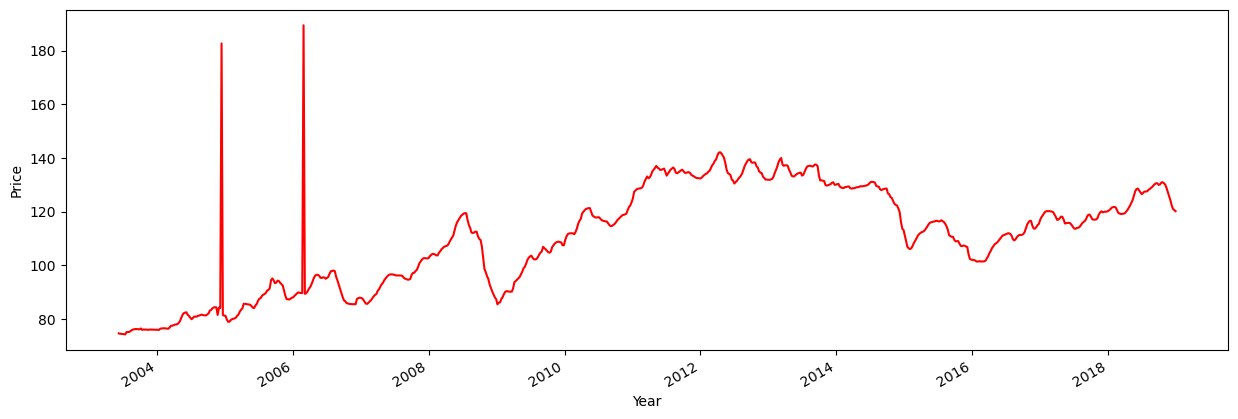

In [46]:
fig, ax = plt.subplots(figsize=(15,5))
fig.autofmt_xdate()
plt.plot(data, c='red')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### Creating a new dataframe containing year, month, day separately

In [19]:
new_data = data.copy()
new_data['Year'] = new_data.index
new_data['Month'] = new_data.index
new_data['Day'] = new_data.index
new_data.head()
format_string = "%Y-%B-%A"
for i in range(len(new_data)):
    Year, Month, Day = new_data.iloc[i, 1].strftime(format_string).split('-')
    new_data.iloc[i, 1] = Year
    new_data.iloc[i, 2] = Month
    new_data.iloc[i, 3] = Day
new_data.head()

,Petrol (USD),Year,Month,Day
Date,,,,
2003-06-09,74.59,2003,June,Monday
2003-06-16,74.47,2003,June,Monday
2003-06-23,74.42,2003,June,Monday
2003-06-30,74.35,2003,June,Monday
2003-07-07,74.28,2003,July,Monday


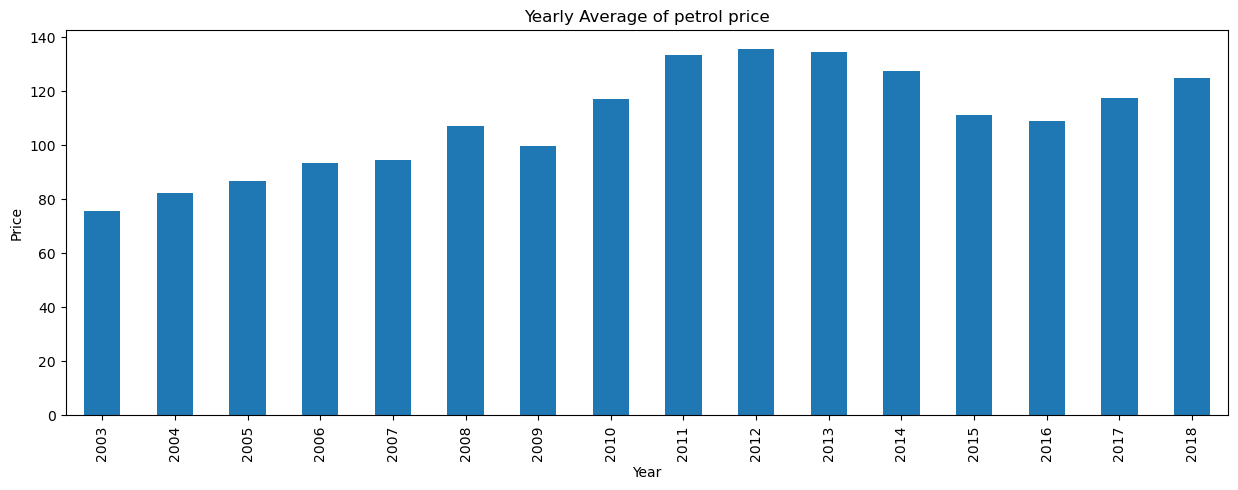

In [54]:
fig, ax = plt.subplots(figsize=(15, 5))
new_data.groupby('Year')['Petrol (USD)'].mean().plot(kind='bar')
plt.title('Yearly Average of petrol price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

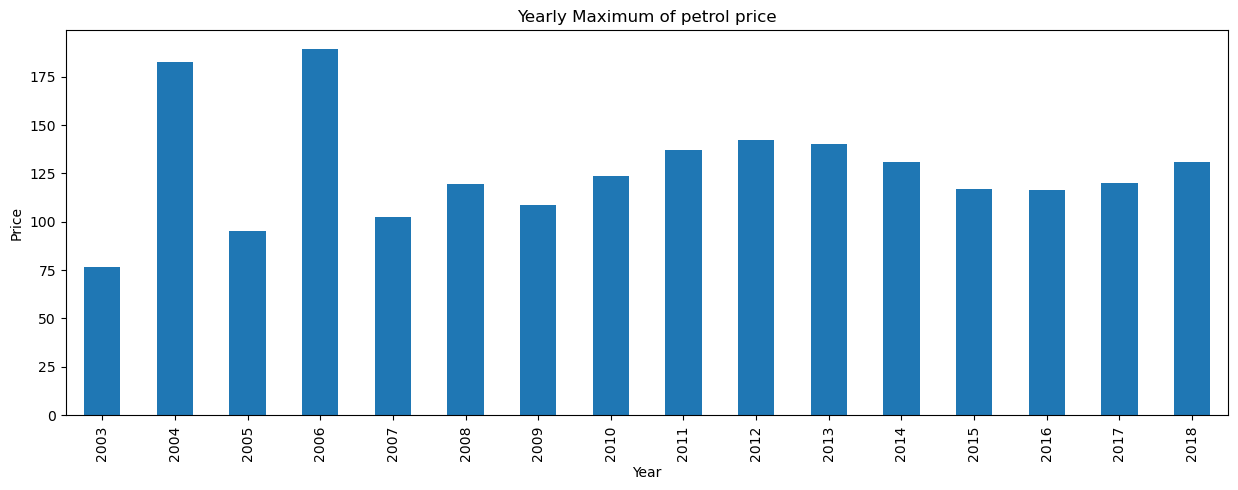

In [53]:
fig, ax = plt.subplots(figsize=(15, 5))
new_data.groupby('Year')['Petrol (USD)'].max().plot(kind='bar')
plt.title('Yearly Maximum of petrol price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

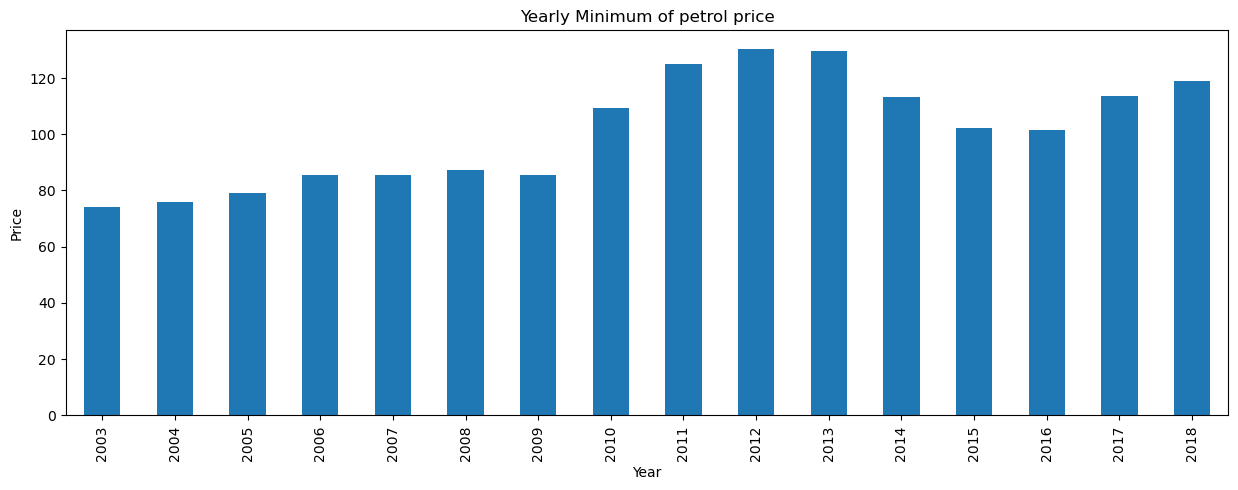

In [51]:
fig, ax = plt.subplots(figsize=(15, 5))
new_data.groupby('Year')['Petrol (USD)'].min().plot(kind='bar')
plt.title('Yearly Minimum of petrol price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()